In [7]:
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [9]:
Vacancy_Rates19 = 'Quarterly Rental Vacancy Rates 1900s.csv'
Vacancy_Rates20 = 'Quarterly Rental Vacancy Rates 2000s.csv'
Interest_Rates = 'fed funds rate historical data.csv'

In [10]:
vacancy19 = pd.read_csv(Vacancy_Rates19)
vacancy19.head()

,DATE,Vacancy Rate
0,1/1/56,6.2
1,4/1/56,5.9
2,7/1/56,6.3
3,10/1/56,5.8
4,1/1/57,5.3


In [11]:
vacancy19.dtypes

DATE             object
Vacancy Rate    float64
dtype: object

In [12]:
years = []
for date in vacancy19['DATE']:
    split_date = date.split('/')
    year = '19' + str(split_date[2])
    years.append(int(year))

vacancy19['year'] = years
vacancy19.head()

,DATE,Vacancy Rate,year
0,1/1/56,6.2,1956
1,4/1/56,5.9,1956
2,7/1/56,6.3,1956
3,10/1/56,5.8,1956
4,1/1/57,5.3,1957


In [13]:
vacancy20 = pd.read_csv(Vacancy_Rates20)

years = []
for date in vacancy20['DATE']:
    split_date = date.split('/')
    year = '20' + str(split_date[2])
    years.append(int(year))

vacancy20['year'] = years
vacancy20.head()

,DATE,Vacancy Rate,year
0,1/1/00,7.9,2000
1,4/1/00,8.0,2000
2,7/1/00,8.2,2000
3,10/1/00,7.8,2000
4,1/1/01,8.2,2001


In [14]:
merged_vacancy = pd.concat([vacancy19,vacancy20])
merged_vacancy.head(5)

,DATE,Vacancy Rate,year
0,1/1/56,6.2,1956
1,4/1/56,5.9,1956
2,7/1/56,6.3,1956
3,10/1/56,5.8,1956
4,1/1/57,5.3,1957


In [15]:
#Store the Average Vacancy Rate Data Grouped by Year
#avg_yearly_vacancy = merged_vacancy.groupby('Year')
#df.resample('D').mean()
#avg_yearly_vacancy.resample('A').mean()

avg_yearly_vacancy = merged_vacancy.groupby('year').agg({'Vacancy Rate': ['mean']})


# Convert to DataFrame
avg_yearly_vacancy = pd.DataFrame(avg_yearly_vacancy)


# Flatten the column headings
avg_yearly_vacancy = avg_yearly_vacancy.reset_index()

# Preview DataFrame
avg_yearly_vacancy.head()

,year,Vacancy Rate
,,mean
0,1956,6.050
1,1957,5.525
2,1958,6.425
3,1959,7.075
4,1960,8.175


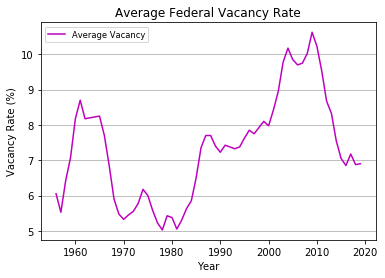

In [16]:
#Plot the Average Yearly Vacancy rate (line graph) 

plt.plot(avg_yearly_vacancy["year"], avg_yearly_vacancy["Vacancy Rate"], color="m", linestyle="-", linewidth=1.50)

plt.title("Average Federal Vacancy Rate")
plt.ylabel("Vacancy Rate (%)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.legend(['Average Vacancy'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("vacancy.png")

# Show the Figure
plt.show()

In [17]:
interest = pd.read_csv(Interest_Rates)
interest.head()

,date,year,interest rate
0,7/1/54,1954,1.13
1,7/2/54,1954,1.25
2,7/3/54,1954,1.25
3,7/4/54,1954,1.25
4,7/5/54,1954,0.88


In [18]:
#Store the Average Interest Rate Grouped by Year 
avg_yearly_interest = interest.groupby('year').agg({'interest rate': ['mean']})

# Convert to DataFrame
avg_yearly_interest = pd.DataFrame(avg_yearly_interest)

# Flatten the column headings
avg_yearly_interest = avg_yearly_interest.reset_index()

# Preview DataFrame
avg_yearly_interest.head()

,year,interest rate
,,mean
0,1954,1.006066
1,1955,1.785699
2,1956,2.728224
3,1957,3.105342
4,1958,1.574055


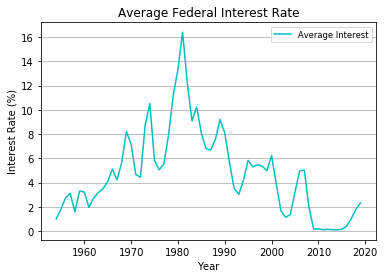

In [19]:
#Plot the Average Yearly Interest rate (line graph) 

plt.plot(avg_yearly_interest["year"], avg_yearly_interest["interest rate"], color="c", linestyle="-", linewidth=1.50)

plt.title("Average Federal Interest Rate")
plt.ylabel("Interest Rate (%)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.legend(['Average Interest'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("interest.png")

# Show the Figure
plt.show()

In [20]:
# Quandl API 
import requests
import json

URL = "https://www.quandl.com/api/v3/datasets/ZILLOW/M20_MLPAH.json?api_key=Y_qydkhKhvyzFTQ3Cit-"

denver_data = requests.get(URL).json()
print(json.dumps(denver_data, indent=4, sort_keys=True))

{
    "dataset": {
        "collapse": null,
        "column_index": null,
        "column_names": [
            "Date",
            "Value"
        ],
        "data": [
            [
                "2019-09-30",
                442000.0
            ],
            [
                "2019-08-31",
                445000.0
            ],
            [
                "2019-07-31",
                450000.0
            ],
            [
                "2019-06-30",
                450000.0
            ],
            [
                "2019-05-31",
                455000.0
            ],
            [
                "2019-04-30",
                450990.0
            ],
            [
                "2019-03-31",
                450000.0
            ],
            [
                "2019-02-28",
                446900.0
            ],
            [
                "2019-01-31",
                444925.0
            ],
            [
                "2018-12-31",
                439900.0
     

In [21]:
column_value = denver_data["dataset"]["column_names"]
date_value = denver_data["dataset"]["data"]

city_data = ([column_value], [date_value])
city_data

([['Date', 'Value']],
 [[['2019-09-30', 442000.0],
   ['2019-08-31', 445000.0],
   ['2019-07-31', 450000.0],
   ['2019-06-30', 450000.0],
   ['2019-05-31', 455000.0],
   ['2019-04-30', 450990.0],
   ['2019-03-31', 450000.0],
   ['2019-02-28', 446900.0],
   ['2019-01-31', 444925.0],
   ['2018-12-31', 439900.0],
   ['2018-11-30', 439000.0],
   ['2018-10-31', 439900.0],
   ['2018-09-30', 439950.0],
   ['2018-08-31', 439900.0],
   ['2018-07-31', 445000.0],
   ['2018-06-30', 449500.0],
   ['2018-05-31', 450000.0],
   ['2018-04-30', 450000.0],
   ['2018-03-31', 450000.0],
   ['2018-02-28', 449900.0],
   ['2018-01-31', 439900.0],
   ['2017-12-31', 434945.0],
   ['2017-11-30', 425000.0],
   ['2017-10-31', 437695.0],
   ['2017-09-30', 442900.0],
   ['2017-08-31', 440000.0],
   ['2017-07-31', 440000.0],
   ['2017-06-30', 439900.0],
   ['2017-05-31', 439600.0],
   ['2017-04-30', 449000.0],
   ['2017-03-31', 440000.0],
   ['2017-02-28', 428000.0],
   ['2017-01-31', 419000.0],
   ['2016-12-31', 415

In [22]:
d = ([['Date', 'Value']],
 [[['2019-08-31', 445000.0],
   ['2019-07-31', 450000.0],
   ['2019-06-30', 450000.0],
   ['2019-05-31', 455000.0],
   ['2019-04-30', 450000.0],
   ['2019-03-31', 450000.0],
   ['2019-02-28', 445000.0],
   ['2019-01-31', 444000.0],
   ['2018-12-31', 439900.0],
   ['2018-11-30', 439000.0],
   ['2018-10-31', 439500.0],
   ['2018-09-30', 439900.0],
   ['2018-08-31', 439900.0],
   ['2018-07-31', 444999.0],
   ['2018-06-30', 449500.0],
   ['2018-05-31', 450000.0],
   ['2018-04-30', 450000.0],
   ['2018-03-31', 450000.0],
   ['2018-02-28', 449900.0],
   ['2018-01-31', 439900.0],
   ['2017-12-31', 435000.0],
   ['2017-11-30', 425000.0],
   ['2017-10-31', 437797.5],
   ['2017-09-30', 442950.0],
   ['2017-08-31', 440000.0],
   ['2017-07-31', 440000.0],
   ['2017-06-30', 439900.0],
   ['2017-05-31', 439500.0],
   ['2017-04-30', 449000.0],
   ['2017-03-31', 440000.0],
   ['2017-02-28', 427500.0],
   ['2017-01-31', 419000.0],
   ['2016-12-31', 415000.0],
   ['2016-11-30', 409925.0],
   ['2016-10-31', 410000.0],
   ['2016-09-30', 415000.0],
   ['2016-08-31', 410950.0],
   ['2016-07-31', 415165.0],
   ['2016-06-30', 419950.0],
   ['2016-05-31', 420000.0],
   ['2016-04-30', 424900.0],
   ['2016-03-31', 419900.0],
   ['2016-02-29', 414900.0],
   ['2016-01-31', 414495.0],
   ['2015-12-31', 399950.0],
   ['2015-11-30', 395000.0],
   ['2015-10-31', 395000.0],
   ['2015-09-30', 395000.0],
   ['2015-08-31', 389900.0],
   ['2015-07-31', 391325.0],
   ['2015-06-30', 389900.0],
   ['2015-05-31', 390000.0],
   ['2015-04-30', 389990.0],
   ['2015-03-31', 380950.0],
   ['2015-02-28', 379995.0],
   ['2015-01-31', 380000.0],
   ['2014-12-31', 373000.0],
   ['2014-11-30', 360000.0],
   ['2014-10-31', 356163.0],
   ['2014-09-30', 350000.0],
   ['2014-08-31', 345950.0],
   ['2014-07-31', 345000.0],
   ['2014-06-30', 345925.0],
   ['2014-05-31', 339000.0],
   ['2014-04-30', 335000.0],
   ['2014-03-31', 329000.0],
   ['2014-02-28', 322200.0],
   ['2014-01-31', 310000.0],
   ['2013-12-31', 309900.0],
   ['2013-11-30', 300000.0],
   ['2013-10-31', 300000.0],
   ['2013-09-30', 300000.0],
   ['2013-08-31', 299000.0],
   ['2013-07-31', 299900.0],
   ['2013-06-30', 292925.0],
   ['2013-05-31', 289900.0],
   ['2013-04-30', 280000.0],
   ['2013-03-31', 274900.0],
   ['2013-02-28', 269500.0],
   ['2013-01-31', 260000.0],
   ['2012-12-31', 260000.0],
   ['2012-11-30', 259925.0],
   ['2012-10-31', 260000.0],
   ['2012-09-30', 260000.0],
   ['2012-08-31', 260000.0],
   ['2012-07-31', 263500.0],
   ['2012-06-30', 265000.0],
   ['2012-05-31', 262800.0],
   ['2012-04-30', 258000.0],
   ['2012-03-31', 251950.0],
   ['2012-02-29', 245000.0],
   ['2012-01-31', 239999.0],
   ['2011-12-31', 240000.0],
   ['2011-11-30', 245000.0],
   ['2011-10-31', 249000.0],
   ['2011-09-30', 249900.0],
   ['2011-08-31', 249900.0],
   ['2011-07-31', 249900.0],
   ['2011-06-30', 249900.0],
   ['2011-05-31', 249900.0],
   ['2011-04-30', 240000.0],
   ['2011-03-31', 239900.0],
   ['2011-02-28', 239000.0],
   ['2011-01-31', 235000.0],
   ['2010-12-31', 238900.0],
   ['2010-11-30', 249900.0],
   ['2010-10-31', 250000.0],
   ['2010-09-30', 254900.0],
   ['2010-08-31', 260000.0],
   ['2010-07-31', 256900.0],
   ['2010-06-30', 259900.0],
   ['2010-05-31', 259900.0],
   ['2010-04-30', 255000.0],
   ['2010-03-31', 255000.0],
   ['2010-02-28', 259000.0],
   ['2010-01-31', 259900.0]]])

denver_df = pd.DataFrame(d[1][0], columns=d[0][0])
denver_df.head()

,Date,Value
0,2019-08-31,445000.0
1,2019-07-31,450000.0
2,2019-06-30,450000.0
3,2019-05-31,455000.0
4,2019-04-30,450000.0


In [23]:
#Pull Year out of Home value df  

years = []
for date in denver_df['Date']:
    split_date = date.split('-')
    year = str(split_date[0])
    years.append(int(year))

denver_df['year'] = years

new_denver_df = denver_df[['Value', 'year']].copy()

new_denver_df.head()

,Value,year
0,445000.0,2019
1,450000.0,2019
2,450000.0,2019
3,455000.0,2019
4,450000.0,2019


In [24]:
#Find the average home value per year 
avg_yearly_value = new_denver_df.groupby('year').agg({'Value': ['mean']})

avg_yearly_value = pd.DataFrame(avg_yearly_value)

avg_yearly_value = avg_yearly_value.reset_index()

# Preview DataFrame
avg_yearly_value.head()

,year,Value
,,mean
0,2010,254941.666667
1,2011,244783.333333
2,2012,257181.166667
3,2013,289668.750000
4,2014,342603.166667


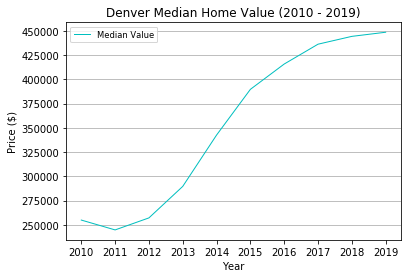

In [25]:
plt.plot(avg_yearly_value["year"], avg_yearly_value["Value"], color="c", linestyle="-", linewidth=1.0)

plt.title("Denver Median Home Value (2010 - 2019)")
plt.ylabel("Price ($)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.legend(['Median Value'],loc="best", fontsize="small", fancybox=True)

plt.xticks(avg_yearly_value.year)

# Save the Figure
plt.savefig("home_value.png")

# Show the Figure
plt.show()

In [31]:
#MERGE ALL THE DATAFRAMES TO CREATE ONE GRAPH  
from functools import reduce

dfs = [avg_yearly_vacancy, avg_yearly_interest, avg_yearly_value]

df_final = reduce(lambda left,right: pd.merge(left,right,on='year'), dfs)
df_final.head()

,year,Vacancy Rate,interest rate,Value
,,mean,mean,mean
0,2010,10.225,0.176027,254941.666667
1,2011,9.525,0.101753,244783.333333
2,2012,8.675,0.140437,257181.166667
3,2013,8.325,0.107397,289668.750000
4,2014,7.550,0.088521,342603.166667


In [ ]:
df_final = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
>>> df.rename(columns={"A": "a", "B": "c"})

In [32]:
## Plot the Average Yearly Interest rate (line graph) 
# may need this for ticks --  [::10]

#df_final[-15:].plot(x='year', y=['interest rate', 'Vacancy Rate', "Value"], figsize=(10,5), grid=True)
#wide_form.melt('year', var_name='interest rate', value_name='Value')

#plt.plot(years, gdp_australia, label='Australia')
#plt.plot(years, gdp_nz, label='New Zealand')

plt.plot(df_final['year', 'interest rate'], label='Interest')

#plt.plot(df_final["year"], df_final["interest rate"], df_final["Vacancy Rate"], df_final["Value"], color='m', linestyle="-", linewidth=1.50)

plt.title("Denver Real Estate Trends")
plt.ylabel("Values")
plt.xlabel("Year")
plt.grid(axis='y')
#plt.legend(['Median Home Value'], ['Federal Interest'], ['Federal Vacancy'], loc="best", fontsize="small", fancybox=True)

plt.xticks(avg_yearly_value.year)

# Save the Figure
plt.savefig("Denver_Trends.png")

# Show the Figure
plt.show()

KeyError: ('year', 'interest rate')

In [36]:
# Select two countries' worth of data.
'Vacancy Rate' = df_final.loc['Australia']
'interest rate' = df_final.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

SyntaxError: can't assign to literal (<ipython-input-36-94c09dabe490>, line 2)

In [38]:

df = df_final(randn(1000, 4), index=ts.index,
              columns=['A', 'B', 'C', 'D'])


df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')


NameError: name 'randn' is not defined